# Iniciação Científica - Rastreador GPS Personalizável Inteligente

## Aluno: Miguel Mendes Daia Cicci
## Orientador: Frederico Renato Gomes

# Dados de localização

## Google Maps

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [9]:
rotas_path = 'C:/workspace/IC/IC_2/data/rotas.xlsx'
rotas = pd.read_excel(rotas_path)
rotas

,latitude,longitude
0,-19.768875,-47.945313
1,-19.769348,-47.945514
2,-19.769915,-47.945815
3,-19.770246,-47.945815
4,-19.770387,-47.946518
...,...,...
289,-19.712019,-47.961594
290,-19.711504,-47.961497
291,-19.711161,-47.961701
292,-19.710979,-47.961862


<Axes: xlabel='latitude', ylabel='longitude'>

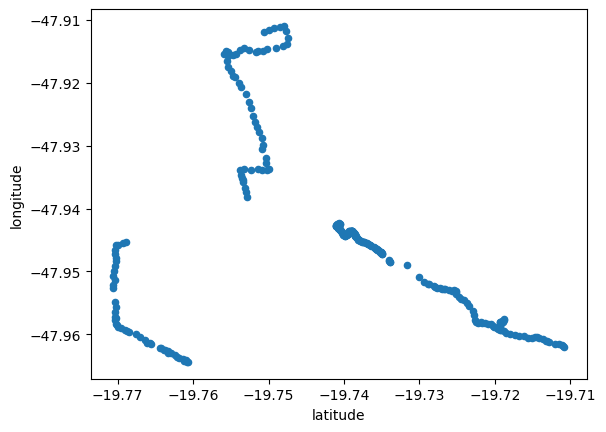

In [10]:
rotas.plot(x='latitude', y='longitude', kind='scatter')

Padronizar dados X Normalizar dados

In [11]:
scaler = StandardScaler()
rotas_p = scaler.fit_transform(rotas)
rotas_p = pd.DataFrame(rotas_p,columns=['latitude','longitude'])
rotas_p

,latitude,longitude
0,-1.737784,0.001388
1,-1.767918,-0.013498
2,-1.804079,-0.035828
3,-1.825172,-0.035828
4,-1.834212,-0.087930
...,...,...
289,1.887390,-1.205104
290,1.920233,-1.197949
291,1.942129,-1.213055
292,1.953721,-1.224981


<Axes: xlabel='latitude', ylabel='longitude'>

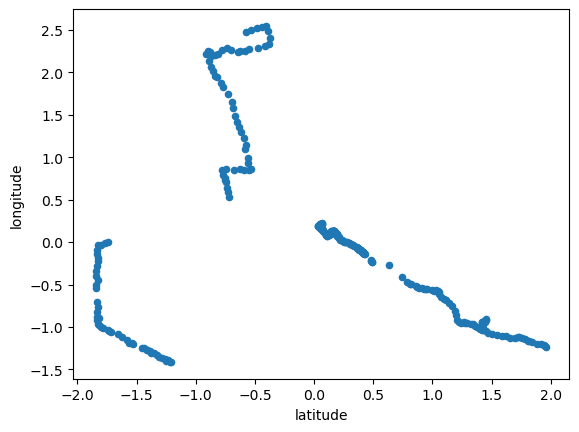

In [12]:
rotas_p.plot(x='latitude', y='longitude', kind='scatter')

# Aplicar algoritmo de clusterização DBSCAN

## (Density-Based Spatial Clustering of Applications with Noise)

Parametros do DBSCAN

In [ ]:
raio = 0.2 #raio das distancias de um ponto até outro
minimo_pontos = 5 #quantidade de pontos para classificar um cluster

InvalidIndexError: (slice(None, None, None), 0)

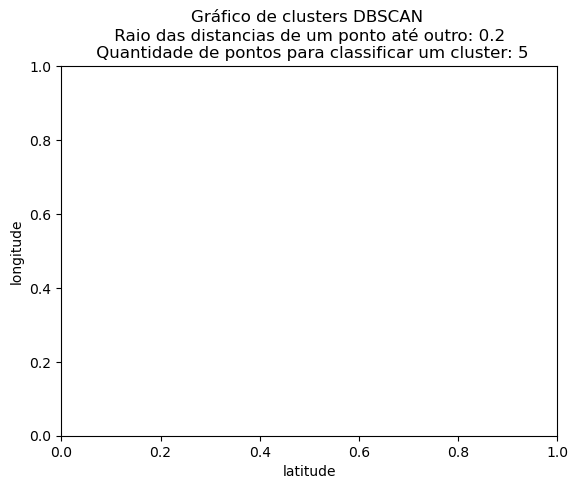

In [ ]:
dbscan_routes = DBSCAN(eps = raio,min_samples=minimo_pontos)
dbscan_fit_routes = dbscan_routes.fit(rotas_p)
rotulos_routes = dbscan_fit_routes.labels_ #Array constituido por -1 significa que ele não conseguiu identificar os klusters
 
# Visualizar os clusters DBSCAN
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Gráfico de clusters DBSCAN \n Raio das distancias de um ponto até outro: 0.2 \n Quantidade de pontos para classificar um cluster: 5')
plt.scatter(routes_normalized[:,0],routes_normalized[:,1],c = rotulos_routes)
ruidos = []
for index, labels in enumerate(rotulos_routes):
    if labels == -1:
        ruidos.append(index)
        plt.scatter(routes_normalized[index,:][0],routes_normalized[index,:][1],marker='x',color='red',s=100)
plt.show()